In [4]:
def smooth(a,WSZ):
  # a:原始数据，NumPy 1-D array containing the data to be smoothed
  # 必须是1-D的，如果不是，请使用 np.ravel()或者np.squeeze()转化 
  # WSZ: smoothing window size needs, which must be odd number,
  # as in the original MATLAB implementation
  out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ
  r = np.arange(1,WSZ-1,2)
  start = np.cumsum(a[:WSZ-1])[::2]/r
  stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
  return np.concatenate(( start , out0, stop ))

In [30]:
import matplotlib.pyplot as plt
import numpy as np
def plotFile(filename,color,lbl):
    with open(filename,'r') as f:
        result = f.readlines()
    score = []
    for i in range(len(result)):
        result[i] = result[i].strip('\n')
        score.append(float(result[i].split(',')[1]))
    score = np.array(score)
    plt.plot(smooth(score,9),color,label=lbl)




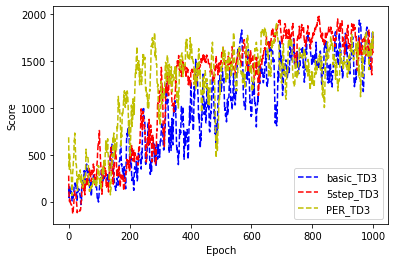

In [31]:
plotFile("steer_only/models12_basic/log.txt",'b--','basic_TD3')
plotFile("steer_only/models11_5step/log.txt",'r--','5step_TD3')
plotFile("steer_only/models12_PER/log.txt",'y--','PER_TD3')
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.savefig("steer_only/result_compare.png")
plt.show()
